# MapReduce

The MapReduce programming technique was designed to analyze massive data sets across a cluster. In this Jupyter notebook, you'll get a sense for how Hadoop MapReduce works; however, this notebook will run locally rather than on a cluster.

The biggest difference between Hadoop and Spark is that Spark tries to do as many calculations as possible in memory, which avoids moving data back and forth across a cluster. Hadoop writes intermediate calculations out to disk, which can be less efficient. Hadoop is an older technology than Spark and one of the cornerstone big data technologies.

If you click on the Jupyter notebook logo at the top of the workspace, you'll be taken to the workspace directory. There you will see a file called "songplays.txt". This is a text file where each line represents a song that was played in the Sparkify app. The MapReduce code will count how many times each song was played. In other words, the code counts how many times the song title appears in the list.


# MapReduce versus Hadoop MapReduce

Don't get confused by the terminology! MapReduce is a programming technique. Hadoop MapReduce is a specific implementation of the programming technique.

Some of the syntax will look a bit funny, so be sure to read the explanation and comments for each section. You'll learn more about the syntax in later lessons. 

Run each of the code cells below to see the output.

In [1]:
# Install mrjob library. This package is for running MapReduce jobs with Python
# In Jupyter notebooks, "!" runs terminal commands from inside notebooks 

! pip install mrjob

   ---------------------------------------- 0.0/439.6 kB ? eta -:--:--
   - ------------------------------------- 20.5/439.6 kB 640.0 kB/s eta 0:00:01
   ----------------- ---------------------- 194.6/439.6 kB 2.9 MB/s eta 0:00:01
   ---------------------------------------- 439.6/439.6 kB 5.5 MB/s eta 0:00:00


In [2]:
%%file wordcount.py
# %%file is an Ipython magic function that saves the code cell as a file

from mrjob.job import MRJob # import the mrjob library

class MRSongCount(MRJob):
    
    # the map step: each line in the txt file is read as a key, value pair
    # in this case, each line in the txt file only contains a value but no key
    # _ means that in this case, there is no key for each line
    def mapper(self, _, song):
        # output each line as a tuple of (song_names, 1) 
        yield (song, 1)

    # the reduce step: combine all tuples with the same key
    # in this case, the key is the song name
    # then sum all the values of the tuple, which will give the total song plays
    def reducer(self, key, values):
        yield (key, sum(values))
        
if __name__ == "__main__":
    MRSongCount.run()

Writing wordcount.py


In [4]:
# run the code as a terminal command
! python wordcount.py songplays.txt

"Broken Networks"	510
"Data House Rock"	828
"Deep Dreams"	1131


No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory C:\Users\Adem_\AppData\Local\Temp\wordcount.Adem_.20240731.092058.736059
Running step 1 of 1...
job output is in C:\Users\Adem_\AppData\Local\Temp\wordcount.Adem_.20240731.092058.736059\output
Streaming final output from C:\Users\Adem_\AppData\Local\Temp\wordcount.Adem_.20240731.092058.736059\output...
Removing temp directory C:\Users\Adem_\AppData\Local\Temp\wordcount.Adem_.20240731.092058.736059...


# Summary of what happens in the code.

There is a list of songs in songplays.txt that looks like the following:

Deep Dreams
Data House Rock
Deep Dreams
Data House Rock
Broken Networks
Data House Rock
etc.....

During the map step, the code reads in the txt file one line at a time. The map steps outputs a set of tuples that look like this:

(Deep Dreams, 1)  
(Data House Rock, 1)  
(Deep Dreams, 1)  
(Data House Rock, 1)  
(Broken Networks, 1)  
(Data House Rock, 1)  
etc.....

Finally, the reduce step combines all of the values by keys and sums the values:  

(Deep Dreams, \[1, 1, 1, 1, 1, 1, ... \])  
(Data House Rock, \[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...\])  
(Broken Networks, \[1, 1, 1, ...\]  

With the output 

(Deep Dreams, 1131)  
(Data House Rock, 510)  
(Broken Networks, 828)  

In [6]:
from IPython.display import Image

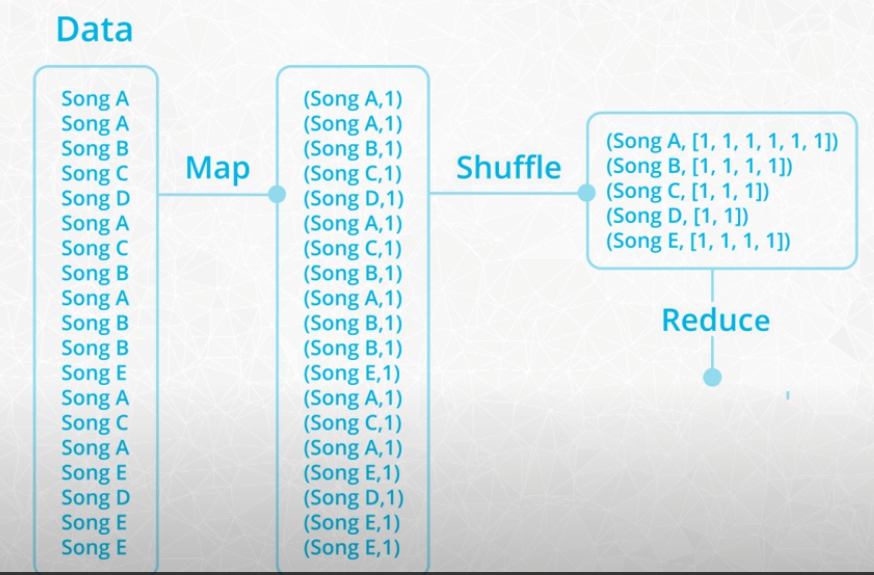

In [8]:
Image("map_reduce.png")

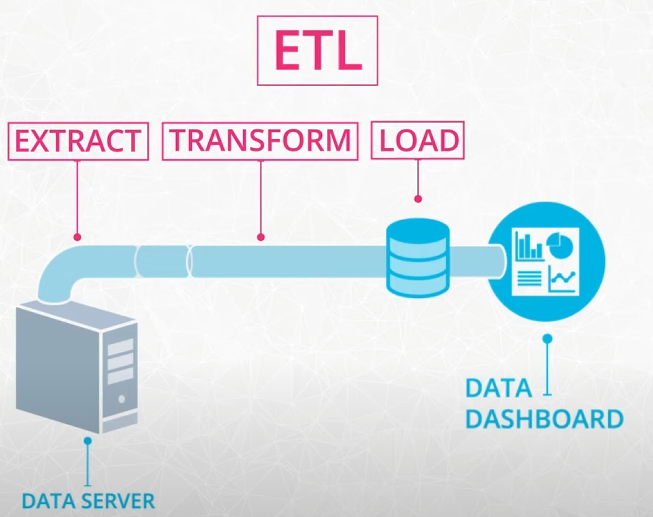

In [7]:
Image("etl.png")